In [30]:
#%load_ext autoreload

#%autoreload 2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
bcell = pd.read_csv("../data/input_bcell.csv")
bcell['set_outcome'] = 'bcell_'+ bcell['target'].astype(str)
print(bcell.shape)
bcell.head()


(14387, 15)


,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target,set_outcome
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1,bcell_1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1,bcell_1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1,bcell_1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1,bcell_1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1,bcell_1


In [32]:
sars = pd.read_csv("../data/input_sars.csv")
sars['set_outcome'] = 'sars_'+ sars['target'].astype(str)
print(sars.shape)


(520, 15)


In [33]:
bcell_sars = pd.concat([bcell, sars] )
print(bcell_sars.shape)
bcell_sars.isnull().values.any() # no missing values

(14907, 15)


False

## draw histogram to see the distribution of variables in two different datasets

In [34]:
def draw_histogram(var_name):
    """draw stack histogram of a variable split by outcome and dataset"""
    graph = sns.displot(bcell_sars, x=var_name, hue="set_outcome", multiple="stack")
    plt.title(f"{var_name} in bcell and sars")
    plt.show(graph)

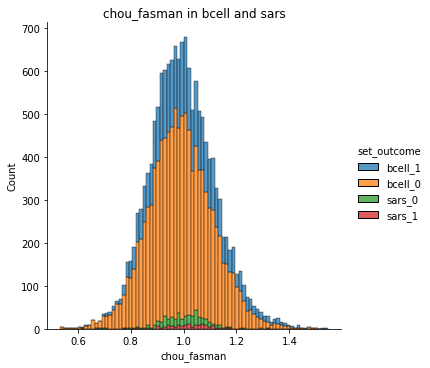

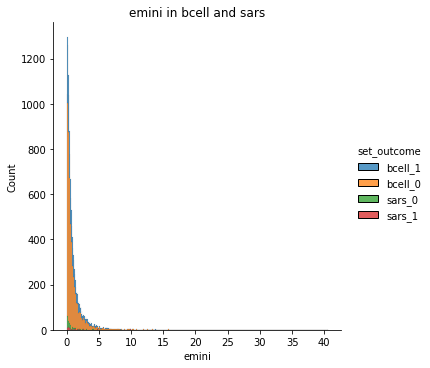

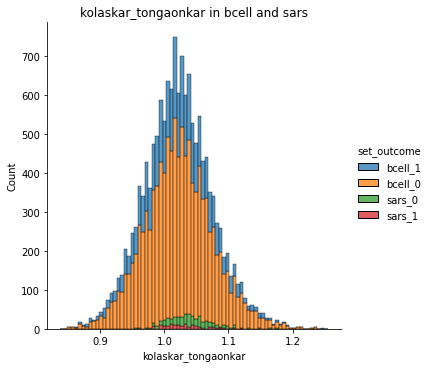

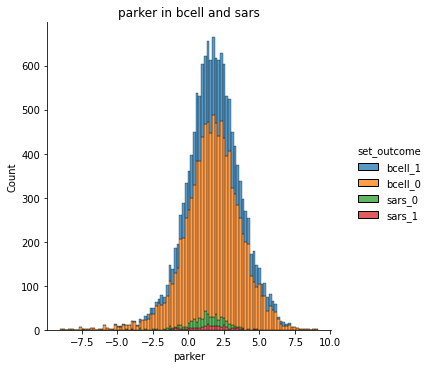

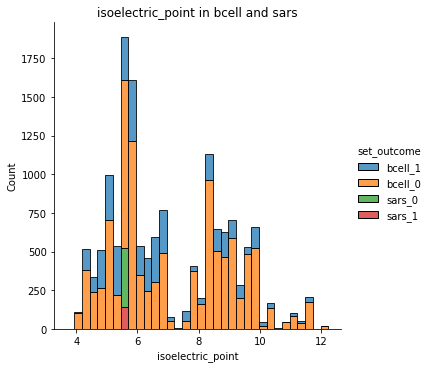

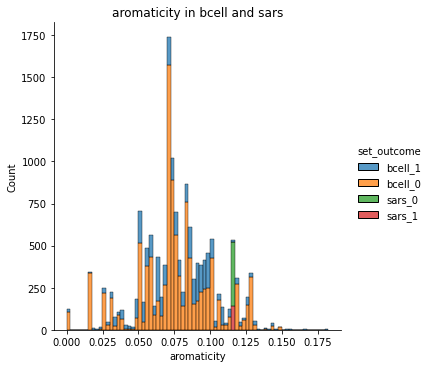

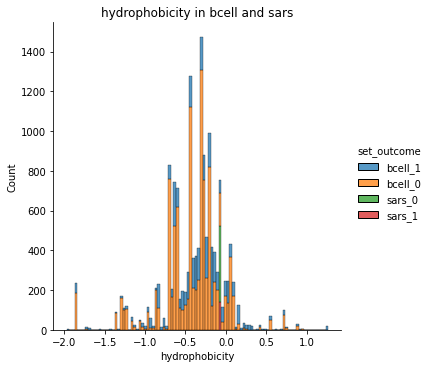

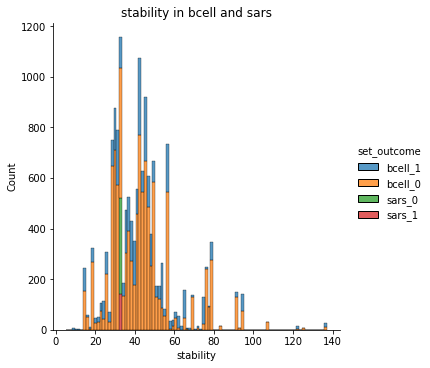

In [35]:
for col in ['chou_fasman', 'emini', 'kolaskar_tongaonkar',
 'parker','isoelectric_point', 'aromaticity','hydrophobicity','stability']:
    draw_histogram(col)

## evaluate length of the peptide parent protein

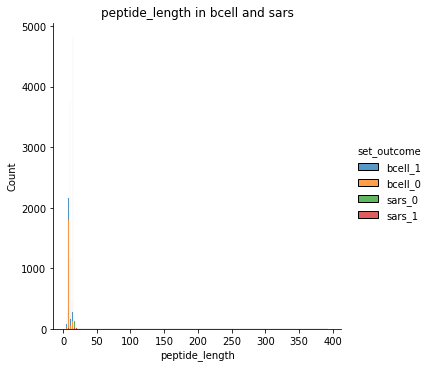

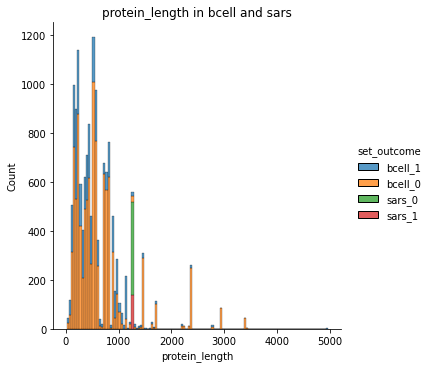

In [36]:
bcell_sars['peptide_length'] = [len(bcell_sars.iloc[i,4]) for i in range(bcell_sars.shape[0]) ]
bcell_sars['protein_length'] = [len(bcell_sars.iloc[i,1]) for i in range(bcell_sars.shape[0]) ]
draw_histogram('peptide_length')
draw_histogram('protein_length')

In [51]:
# peptide length seem to vary a lot, see the min an max value and count
print(bcell_sars['peptide_length'].max(), bcell_sars['peptide_length'].min())
bcell_sars.peptide_length.value_counts()
bcell_sars[bcell_sars['peptide_length']<30].shape#peptide_length.value_counts()
bcell_sars[bcell_sars['peptide_length']>30].peptide_length.value_counts()
bcell_sars[bcell_sars['peptide_length']<30]['peptide_length'].max()

393 5


28

In [59]:
test = bcell_sars[bcell_sars['peptide_length']<30]
#test['peptide_seq'].value_counts()
test[test['peptide_seq']=="DATSTGNYNYKYRYLRHGKLRPFERD"]["set_outcome"]

175    sars_1
176    sars_1
177    sars_1
179    sars_1
Name: set_outcome, dtype: object

#### not going fiter on protein sequence since unirep can take any length of seq and do padding and transformation internally

In [48]:
# protein length seem to vary a lot, see the min an max value and count
print(bcell_sars['protein_length'].max(), bcell_sars['protein_length'].min())
bcell_sars.protein_length.value_counts()
#bcell_sars[bcell_sars['protein_length']<30].shape#peptide_length.value_counts()
bcell_sars[bcell_sars['protein_length']>1500].protein_length.value_counts()
bcell_sars[bcell_sars['protein_length']>1500].set_outcome.value_counts()

4967 13


bcell_0    543
bcell_1     84
Name: set_outcome, dtype: int64

In [29]:
bcell_sars.to_csv("../data/bcell_sars_processed.csv", index=False)